# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
df = pd.read_csv('G:\EBAC\Provas\Modulo 11\housing.csv')
var = sns.load_dataset('tips')

# Verificação de valores ausentes
print(df.isnull().sum())

# Codificar variável categórica 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Preencher valores ausentes (se houver) com a mediana da coluna
df.fillna(df.median(), inplace=True)

# Verificar os dados após tratamento
print(df.head())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

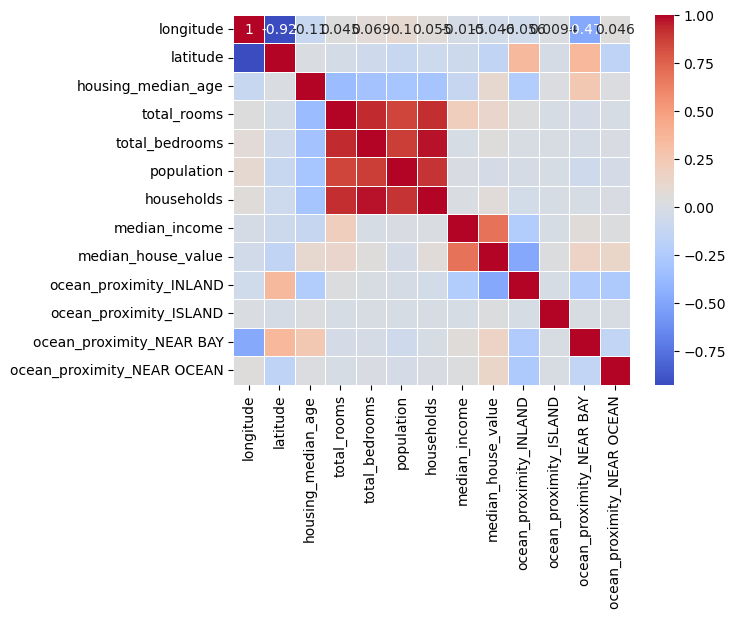

In [5]:
corr_matrix = df.corr()

# Plotar a matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Até então, a variável "Housing_Mediam_Age" é a melhor opção que temos, fora ela, não é possível encontrar nenhuma outra variável com potencial preditivo.


### 3. Separe os dados em validação e teste

In [50]:
X = df.drop(columns=['median_house_value']).copy()  # Correção das colunas
y = df['median_house_value']

# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [52]:
from sklearn.metrics import mean_squared_error

# Árvore 1, profundidade = 8
regr_1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=15)
regr_1.fit(X_train, y_train)
mse1 = regr_1.score(X_test, y_test)
print(f"MSE da árvore com profundidade {regr_1.get_depth()}: {mse1:.2f}".replace(".",","))

# Árvore 2, profundidade = 2
regr_2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=15)
regr_2.fit(X_train, y_train)
mse2 = regr_2.score(X_test, y_test)
print(f"MSE da árvore com profundidade {regr_2.get_depth()}: {mse2:.2f}".replace(".",","))

MSE da árvore com profundidade 8: 0,69
MSE da árvore com profundidade 2: 0,48


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [54]:
# Predições e MSE
y_pred_1_train = regr_1.predict(X_train)
y_pred_2_train = regr_2.predict(X_train)
y_pred_1_test = regr_1.predict(X_test)
y_pred_2_test = regr_2.predict(X_test)

mse1_train = mean_squared_error(y_train, y_pred_1_train)
mse2_train = mean_squared_error(y_train, y_pred_2_train)
mse1_test = mean_squared_error(y_test, y_pred_1_test)
mse2_test = mean_squared_error(y_test, y_pred_2_test)

# Exibição dos MSEs
print(f"O MSE da árvore com profundidade = 8 no treino é: {mse1_train:.2f}")
print(f"O MSE da árvore com profundidade = 2 no treino é: {mse2_train:.2f}")
print(f"O MSE da árvore com profundidade = 8 no teste é: {mse1_test:.2f}")
print(f"O MSE da árvore com profundidade = 2 no teste é: {mse2_test:.2f}")

O MSE da árvore com profundidade = 8 no treino é: 3274231013.93
O MSE da árvore com profundidade = 2 no treino é: 6694138805.01
O MSE da árvore com profundidade = 8 no teste é: 4166497378.10
O MSE da árvore com profundidade = 2 no teste é: 6953882713.80


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Após a realização de alguns testes com diferentes profundidades, a árvore com profundidade máxima igual a 2 parece ser mais adequeda.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

<Figure size 2000x1000 with 0 Axes>

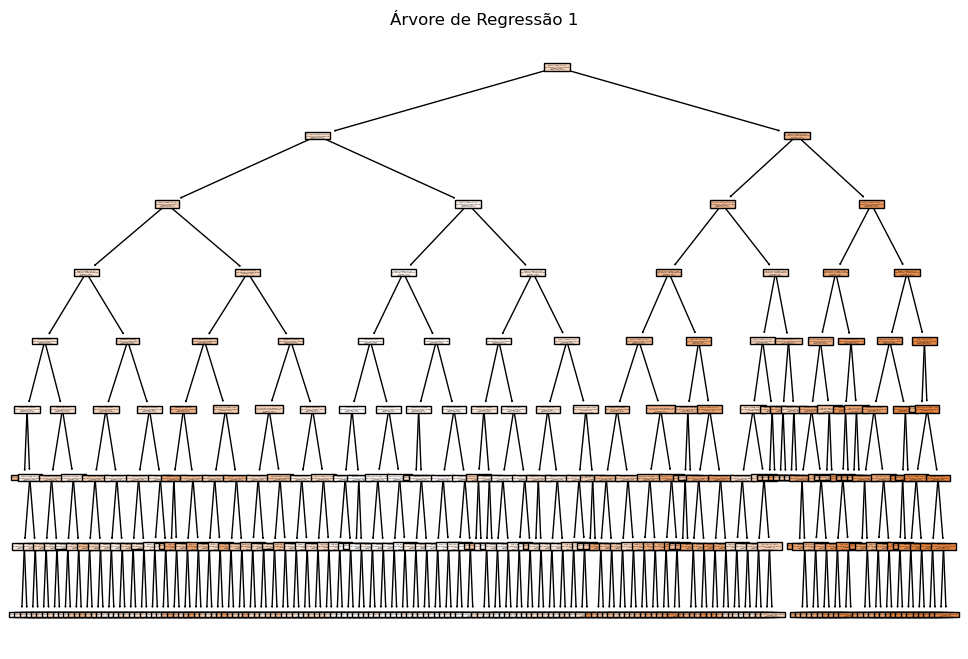

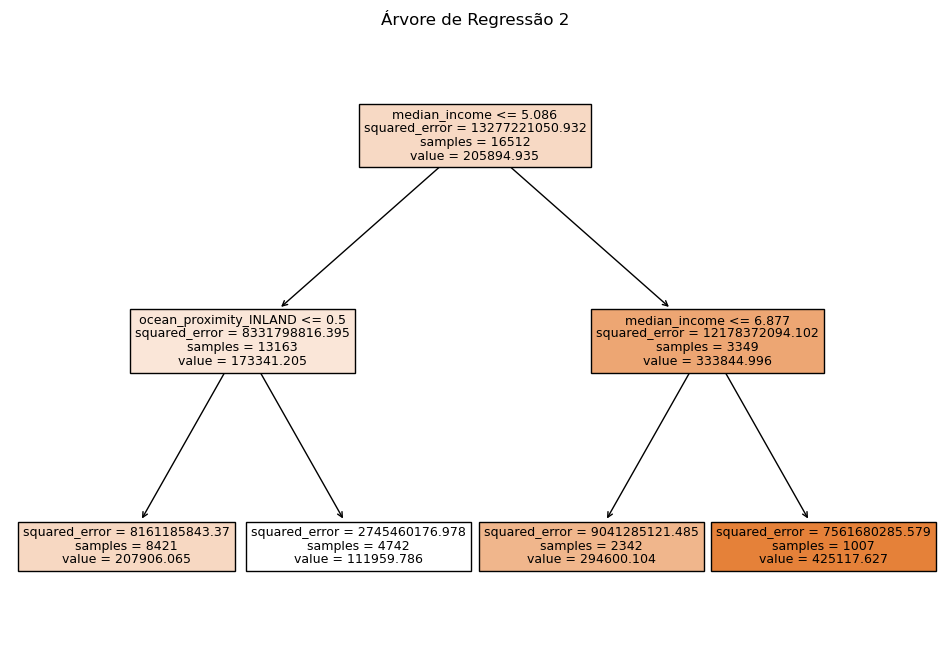

In [56]:
plt.figure(figsize=(20, 10))

# Visualização gráfica da Árvore 1
plt.figure(figsize=(12, 8))
tree.plot_tree(regr_1, feature_names=X.columns, filled=True)
plt.title("Árvore de Regressão 1")
plt.show()

# Visualização gráfica da Árvore 2
plt.figure(figsize=(12, 8))
tree.plot_tree(regr_2, feature_names=X.columns, filled=True)
plt.title("Árvore de Regressão 2")
plt.show()